# Advection in JAX

In [2]:
import jax
import jax.lax as lax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import Array, random, jit
from jax.typing import ArrayLike

For a given advected quantity $q(x, t)$ the advection equation can be written as.
$$\frac{\partial q(x, t)}{\partial t} + A \frac{\partial q(x, t)}{\partial x} = 0$$
We then discretize it using first order forward approximations in time and space.
$$\frac{q_i^{n+1} - q_i^n}{\Delta t} + A \frac{q_{i+1}^n - q_{i-1}^n}{2\Delta x} = 0$$
This gives us an expression for $q_i^{n+1}$.
$$q_i^{n+1} = q_i^n - \frac{1}{2} \frac{\Delta t \cdot A}{\Delta x} \left(q_{i+1}^n - q_{i-1}^n\right)$$

In [19]:
def advection(u=1.0, n=100, its=1000, dt=1.0, L=1.0) -> Array:
    """
    Advection of a Gaussian profile with periodic boundary conditions.

    Args:
        u: Advection speed.
        n: Number of grid points.
        its: Number of iterations.
        dt: Time step.
        L: Length of the domain.

    Returns:
        phi: The final state of the advection.
    """
    dx = L / n
    phi = jnp.exp(-(jnp.linspace(0, L, n) - (L/2))** 2 / 10.0)

    @jit
    def advection_iter(
        phi: ArrayLike, u: float, dx: float, dt: float
    ) -> Array:
        return phi - dt * u / (dx) * (jnp.roll(phi, 0) - jnp.roll(phi, 1))

    for i in range(1, its):
        phi = advection_iter(phi, u, dx, dt)

    return phi

#with jax.profiler.trace("/tmp/jax-trace", create_perfetto_link=True, ):
phi = advection(n=int(1e9), its=10000, dt=0.01, L=1.0)

KeyboardInterrupt: 

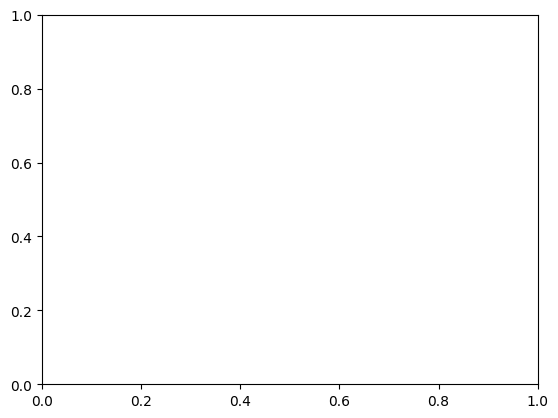

In [18]:
plt.plot(phi)

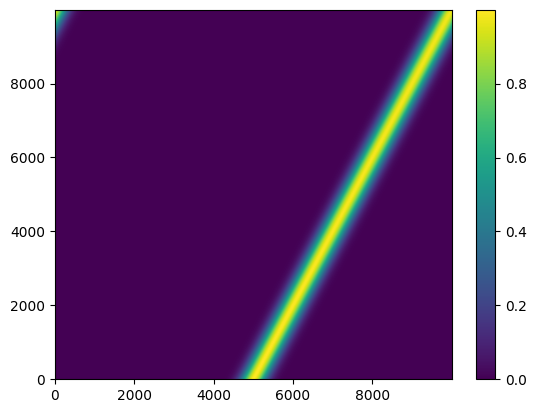

In [ ]:
plt.imshow(phi, aspect="auto",origin="lower")
plt.colorbar()

In [ ]:
plt.plot(phi[-1])